## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [86]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [87]:
#matrix = np.random.uniform(low=-1, high=1, size=(10,10))
matrix = np.random.random((10,10))*2-1
matrix

array([[-0.91674757,  0.24475811, -0.93969471,  0.17778985,  0.9561058 ,
        -0.27741211, -0.5861799 ,  0.43753071, -0.89495746, -0.17073034],
       [ 0.13095621, -0.93616747,  0.47093536, -0.93236963,  0.66383721,
         0.61483285, -0.36037371, -0.77256172, -0.65082666,  0.37861432],
       [ 0.59432881, -0.30803543,  0.11791926,  0.55751077,  0.58331213,
         0.11715578,  0.82705695, -0.46417041,  0.06118349,  0.65030041],
       [-0.08639107, -0.16334191,  0.64000506,  0.00251136,  0.20168565,
         0.928914  ,  0.84989379, -0.64690615, -0.96505167,  0.39334258],
       [ 0.71664901, -0.51808779, -0.76888039,  0.58708998,  0.86317642,
        -0.22371091,  0.30960967,  0.59988972, -0.39671867, -0.86356211],
       [-0.98558249, -0.06158008, -0.64601556, -0.23837253,  0.83526312,
        -0.25867308,  0.92023821,  0.53242222,  0.63452464,  0.92044711],
       [ 0.25090335,  0.10216783, -0.39755433, -0.86492522, -0.44427213,
         0.23064333, -0.4152108 , -0.76694731

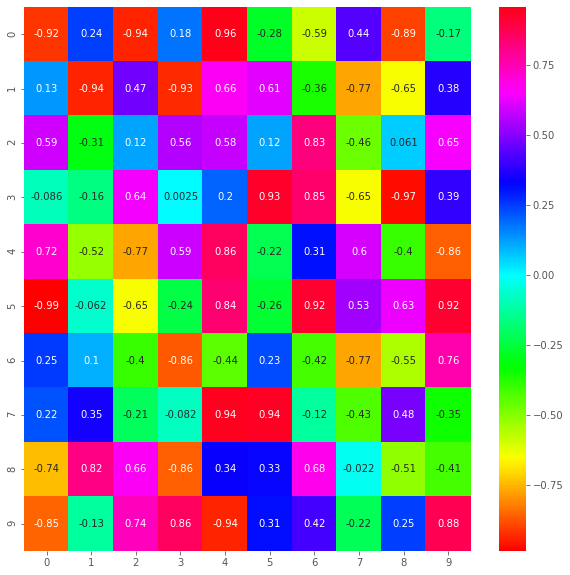

In [88]:
plt.figure(figsize=(10,10))

heatmap = sns.heatmap(matrix, cmap='hsv', annot=True)
plt.show()

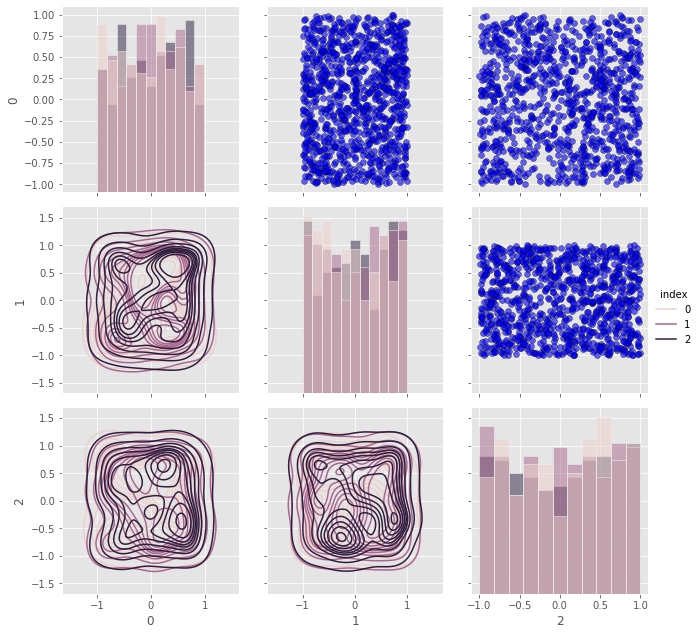

In [91]:
nrow = 1000
ncol = 3

matrix = np.random.random((nrow,ncol)) * np.random.choice([-1,1], size=(nrow,ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter, color = 'blue',edgecolor = 'k',alpha = 0.6)
grid.map_diag(sns.histplot, color=".3")
grid.map_lower(sns.kdeplot)

grid.add_legend()
plt.show()

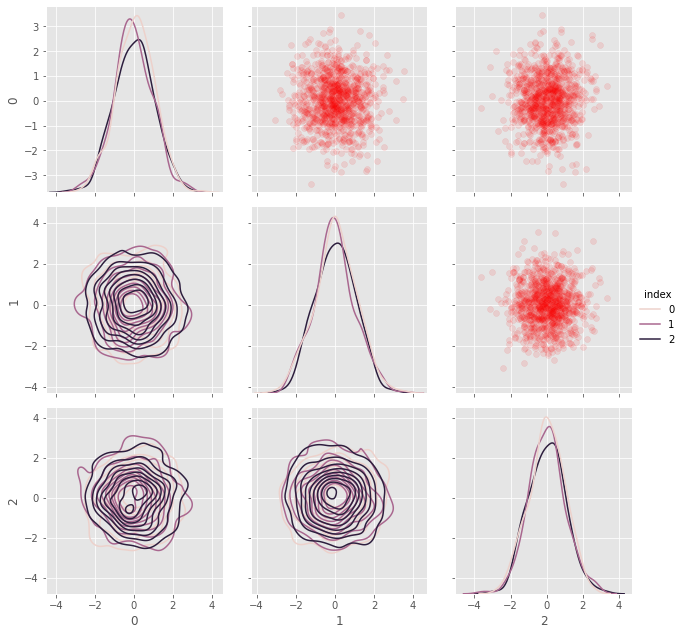

In [90]:
nrow = 1000
ncol = 3

matrix = np.random.normal(size=(nrow,ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.1, color = 'r')
grid.map_diag(sns.kdeplot, color=".8")
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

grid.add_legend()
plt.show()